In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [39]:
import numpy as np
history = []

# グリッドの設定
grid_size = (4, 4)  # 4x4グリッド
terminal_state = [(0, 0), (3, 3)]  # 終端状態
actions = ["up", "down", "left", "right"]

# 報酬と遷移
rewards = -1  # すべての遷移で報酬は -1
gamma = 1.0  # 割引率 (episodic task なので割引なし)

# 移動関数
def move(x, y, action):
    if action == "up" and x > 0:
        return x - 1, y
    if action == "down" and x < grid_size[0] - 1:
        return x + 1, y
    if action == "left" and y > 0:
        return x, y - 1
    if action == "right" and y < grid_size[1] - 1:
        return x, y + 1
    return x, y

# 反復方策評価
v = np.zeros(grid_size)  # 初期化
theta = 1e-4  # 収束条件
delta = float('inf')  # 変化量の初期値
counter = 0

while delta > theta:
    delta = 0
    v_new = np.zeros_like(v)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) in terminal_state:
                continue  # 終端状態は更新しない
            value = 0
            for action in actions:
                x_new, y_new = move(x, y, action)
                value += 0.25 * (rewards + v[x_new, y_new])  # 方策の下での期待値
            v_new[x, y] = value
            delta = max(delta, abs(v_new[x, y] - v[x, y]))
    v = v_new.copy()
    counter += 1
    if counter ==1 or counter % 10 == 0:
        history.append(v.copy())

# 結果の表示
print("状態価値関数:")
print(v)
print(counter)


状態価値関数:
[[  0.         -13.99893866 -19.99842728 -21.99824003]
 [-13.99893866 -17.99861452 -19.9984378  -19.99842728]
 [-19.99842728 -19.9984378  -17.99861452 -13.99893866]
 [-21.99824003 -19.99842728 -13.99893866   0.        ]]
173


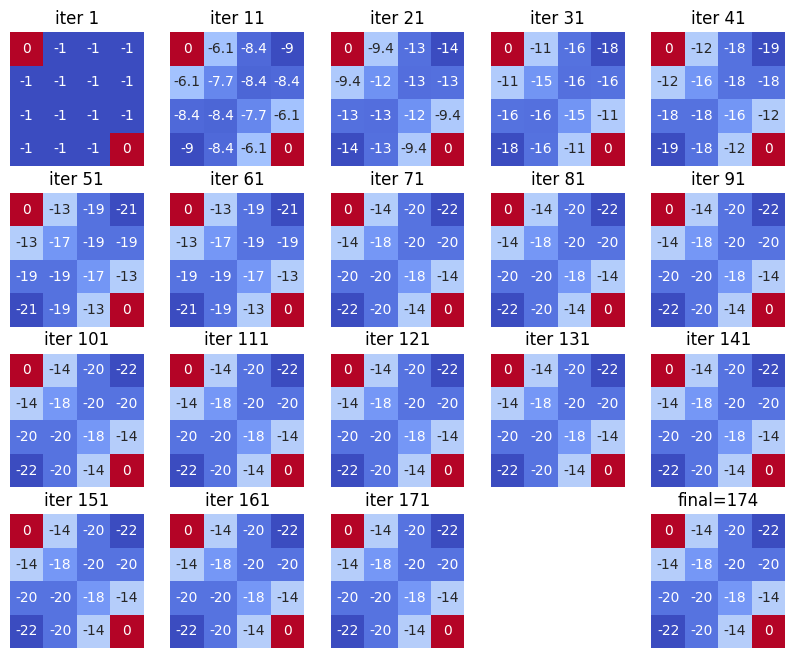

In [41]:
plt.figure(figsize=(10, 8))  # 4x5のプロットに合わせてサイズを調整
for i, h in enumerate(history):
    plt.subplot(4, 5, i + 1)
    sns.heatmap(h, annot=True, cbar=False, cmap='coolwarm', square=True, xticklabels=False, yticklabels=False)
    plt.title(f'iter {(i)*10+1}')
plt.subplot(4, 5, 20)  # 最後のプロットの位置を調整
sns.heatmap(v, annot=True, cbar=False, cmap='coolwarm', square=True, xticklabels=False, yticklabels=False) 
plt.title('final=174') 
plt.show()

$$
q_\pi(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') q_\pi(s', a') \right].
$$

In [44]:
q = {}
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if (x,y) in terminal_state:
            continue
        q[(x,y)] = {}
        for action in actions:
            x_new, y_new = move(x, y, action)
            q[(x,y)][action] = rewards + v[x_new, y_new]

print("\n行動価値関数 q(s, a):")
for state, actions in q.items():
    print(f"状態 {state}:")
    for action, value in actions.items():
        print(f"  行動 {action}: {value:.2f}")

# 最適方策
optimal_policy = {}
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if (x, y) in terminal_state:
            continue
        optimal_policy[(x, y)] = max(q[(x, y)], key=q[(x, y)].get)

print("\n最適方策:")
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if (x, y) in terminal_state:
            print("    ", end="")
        else:
            print(f"{optimal_policy[(x, y)]:^5}", end="")
    print()



行動価値関数 q(s, a):
状態 (0, 1):
  行動 up: -15.00
  行動 down: -19.00
  行動 left: -1.00
  行動 right: -21.00
状態 (0, 2):
  行動 up: -21.00
  行動 down: -21.00
  行動 left: -15.00
  行動 right: -23.00
状態 (0, 3):
  行動 up: -23.00
  行動 down: -21.00
  行動 left: -21.00
  行動 right: -23.00
状態 (1, 0):
  行動 up: -1.00
  行動 down: -21.00
  行動 left: -15.00
  行動 right: -19.00
状態 (1, 1):
  行動 up: -15.00
  行動 down: -21.00
  行動 left: -15.00
  行動 right: -21.00
状態 (1, 2):
  行動 up: -21.00
  行動 down: -19.00
  行動 left: -19.00
  行動 right: -21.00
状態 (1, 3):
  行動 up: -23.00
  行動 down: -15.00
  行動 left: -21.00
  行動 right: -21.00
状態 (2, 0):
  行動 up: -15.00
  行動 down: -23.00
  行動 left: -21.00
  行動 right: -21.00
状態 (2, 1):
  行動 up: -19.00
  行動 down: -21.00
  行動 left: -21.00
  行動 right: -19.00
状態 (2, 2):
  行動 up: -21.00
  行動 down: -15.00
  行動 left: -21.00
  行動 right: -15.00
状態 (2, 3):
  行動 up: -21.00
  行動 down: -1.00
  行動 left: -19.00
  行動 right: -15.00
状態 (3, 0):
  行動 up: -21.00
  行動 down: -23.00
  行動 left: -23.00
  行動 right: -21.00
状態

## 方策改善

In [46]:
import numpy as np

# グリッド設定
grid_size = (4, 4)  # 4x4グリッド
terminal_state = [(0, 0), (3, 3)]  # 終端状態
actions = ["up", "down", "left", "right"]

# 報酬と割引率
rewards = -1  # 全ての遷移で報酬は -1
gamma = 0.9  # 割引率

# 移動関数
def move(x, y, action):
    if action == "up" and x > 0:
        return x - 1, y
    if action == "down" and x < grid_size[0] - 1:
        return x + 1, y
    if action == "left" and y > 0:
        return x, y - 1
    if action == "right" and y < grid_size[1] - 1:
        return x, y + 1
    return x, y  # 境界で留まる

# 初期方策（ランダム方策）
policy = np.random.choice(actions, size=grid_size)

# 方策評価（反復方策評価）
def policy_evaluation(policy, theta=1e-4):
    v = np.zeros(grid_size)
    while True:
        delta = 0
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if (x, y) in terminal_state:
                    continue  # 終端状態はスキップ
                action = policy[x, y]
                x_new, y_new = move(x, y, action)
                new_value = rewards + gamma * v[x_new, y_new]
                delta = max(delta, abs(v[x, y] - new_value))
                v[x, y] = new_value
        if delta < theta:
            break
    return v

# 方策改善
def policy_improvement(v):
    new_policy = policy.copy()
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) in terminal_state:
                continue
            values = []
            for action in actions:
                x_new, y_new = move(x, y, action)
                values.append(rewards + gamma * v[x_new, y_new])
            new_policy[x, y] = actions[np.argmax(values)]
    return new_policy

# 方策反復の実行
for i in range(10):
    v = policy_evaluation(policy)
    new_policy = policy_improvement(v)
    print(f"反復 {i + 1}")
    print("方策:")
    print(policy)
    if np.array_equal(policy, new_policy):
        break
    policy = new_policy

# 結果の表示
print("最終的な方策:")
print(policy)
print("最終的な価値関数:")
print(v)


反復 1
方策:
[['right' 'left' 'down' 'right']
 ['right' 'left' 'down' 'left']
 ['down' 'down' 'up' 'right']
 ['right' 'down' 'right' 'right']]
反復 2
方策:
[['right' 'left' 'left' 'up']
 ['up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'down']
 ['up' 'right' 'right' 'right']]
反復 3
方策:
[['right' 'left' 'left' 'left']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'down' 'down']
 ['right' 'right' 'right' 'right']]
反復 4
方策:
[['right' 'left' 'left' 'down']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'down' 'down']
 ['up' 'right' 'right' 'right']]
最終的な方策:
[['right' 'left' 'left' 'down']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'down' 'down']
 ['up' 'right' 'right' 'right']]
最終的な価値関数:
[[ 0.   -1.   -1.9  -2.71]
 [-1.   -1.9  -2.71 -1.9 ]
 [-1.9  -2.71 -1.9  -1.  ]
 [-2.71 -1.9  -1.    0.  ]]


In [47]:
v

array([[ 0.  , -1.  , -1.9 , -2.71],
       [-1.  , -1.9 , -2.71, -1.9 ],
       [-1.9 , -2.71, -1.9 , -1.  ],
       [-2.71, -1.9 , -1.  ,  0.  ]])